# Clustering(Siniflandirma)

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('maliciousornot.xlsx')

In [3]:
df

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,...,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,...,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,...,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,...,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,...,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,27.927387,29.002513,183.937333,1915.798000,143.782000,0.150129,0.315932,0.179922,0.223575,...,32.966233,34.196800,215.154867,2625.640667,182.642000,0.273704,0.531993,0.287046,266.838667,0.092163
544,1,26.075060,36.593167,169.947733,1633.415333,0.126684,0.133937,186.528000,0.126826,0.226942,...,30.686447,49.546500,200.776667,2242.222000,0.151036,0.248963,0.416450,0.210880,0.333160,0.085971
545,1,21.502533,36.372960,140.284600,1111.525533,0.109520,0.132513,0.119831,0.068679,205.958000,...,24.585427,44.196773,164.118733,1455.954667,0.147538,0.400776,0.440802,0.183678,0.287305,0.101295
546,1,26.683867,37.992127,181.476200,1638.596667,0.152590,358.807333,0.455180,196.890667,0.310491,...,33.341880,51.062040,239.118533,2358.802000,213.730000,1.124479,1.215929,343.263333,0.529403,160.621333


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [5]:
df.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,...,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,...,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,...,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,...,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,...,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,...,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,...,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


In [6]:
df.corr()['Type'].sort_values()

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
%matplotlib inline

<AxesSubplot:>

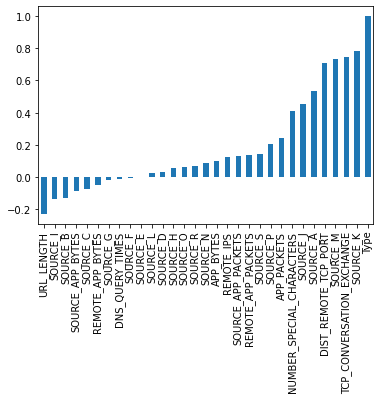

In [9]:
df.corr()['Type'].sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Type', ylabel='count'>

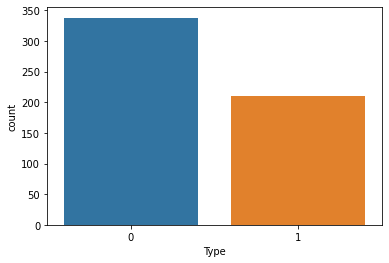

In [10]:
sns.countplot(x='Type', data=df)

## Verilerimizi test ve train olarak bolelim;

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
y = df['Type'].values

In [13]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [14]:
X = df.drop(labels='Type', axis=1).values

In [15]:
X

array([[2.33030467e+01, 1.34455600e+01, 1.59066933e+02, ...,
        3.43781467e-01, 5.95982867e-01, 1.54015133e-01],
       [2.66450067e+01, 2.30180733e+01, 1.72149800e+02, ...,
        2.40932000e+02, 3.56216667e+02, 1.15310573e-01],
       [2.55051133e+01, 2.75258333e+01, 1.68393333e+02, ...,
        3.14766000e+02, 4.68003933e-01, 1.13445293e-01],
       ...,
       [2.15025333e+01, 3.63729600e+01, 1.40284600e+02, ...,
        1.83678267e-01, 2.87304933e-01, 1.01295067e-01],
       [2.66838667e+01, 3.79921267e+01, 1.81476200e+02, ...,
        3.43263333e+02, 5.29402733e-01, 1.60621333e+02],
       [1.00517867e+01, 3.17874800e+01, 6.20723733e+01, ...,
        0.00000000e+00, 3.71890200e-01, 9.11785133e-02]])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15, test_size=0.33)

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

In [39]:
scaler.fit(X_train)

MinMaxScaler()

In [40]:
X_train = scaler.fit_transform(X_train)

In [41]:
X_test = scaler.transform(X_test)

In [42]:
X_train

array([[5.52343406e-04, 7.17012448e-01, 3.34876650e-01, ...,
        1.91168385e-04, 1.43239764e-04, 5.45260716e-05],
       [6.92202837e-04, 5.47717842e-01, 4.27821160e-01, ...,
        6.98969072e-04, 3.14060996e-04, 4.04695626e-04],
       [1.06313437e-03, 3.78008299e-01, 5.82613503e-01, ...,
        7.07903780e-01, 3.12589985e-04, 2.01682861e-04],
       ...,
       [2.83772759e-04, 4.34439834e-01, 2.23274134e-01, ...,
        2.71786942e-04, 2.94570091e-04, 1.42588857e-04],
       [2.01681354e-04, 3.68464730e-01, 1.83815908e-01, ...,
        2.71030928e-04, 1.25955376e-04, 1.27844268e-04],
       [5.01669699e-04, 2.86721992e-01, 3.12210628e-01, ...,
        2.13814433e-04, 2.04654502e-04, 1.25878322e-04]])

In [43]:
X_test

array([[2.22964311e-04, 1.39834025e-01, 1.87132886e-01, ...,
        1.89209622e-04, 2.37752265e-04, 7.23352233e-05],
       [1.16853568e-03, 4.87551867e-01, 6.13019142e-01, ...,
        4.96563574e-04, 1.23564982e-04, 9.28620053e-05],
       [3.58769845e-04, 2.96265560e-01, 2.44627185e-01, ...,
        9.56701031e-05, 6.45406380e-05, 3.77577145e-05],
       ...,
       [6.13151854e-04, 2.40663900e-01, 3.70810587e-01, ...,
        4.73883162e-04, 2.55220529e-04, 1.64272078e-04],
       [1.32359723e-03, 5.05809129e-01, 7.14601617e-01, ...,
        8.35738832e-04, 2.16054842e-04, 1.76530325e-04],
       [3.88160595e-04, 2.81327801e-01, 2.59691797e-01, ...,
        2.02130584e-04, 1.50227069e-04, 5.14036878e-05]])

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## X egitim verimizin Column sayisi kadar Perceptron olusturmamiz tavsiye edilir!!!

In [45]:
X_train.shape

(367, 30)

In [46]:
model = Sequential()

model.add(Dense(units=30, activation='relu')) # Data Frame Column sayisi onerilir!
model.add(Dense(units=15, activation='relu')) # Column sayisi ile 1 arasi bir deger
model.add(Dense(units=15, activation='relu')) # Column sayisi ile 1 arasi bir deger

model.add(Dense(units=1, activation='sigmoid')) # Output(y) Layer -> 1 olur! 

model.compile(optimizer='adam', loss='binary_crossentropy') # Clusterin yaptigimizdan 0 veya 1 olarak gruplandircaz

### Overfitting; Asiri Uyma. Bir analizin, modelin belirli bir veri setine asiri oranda uyum gostermesi durumudur. Veri Setinde yer almayan bir veride uyum saglayamamasi problemine denir.

In [47]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), verbose=1, epochs=700) # overfitting icin epochs=700 verdik

Epoch 1/700
12/12 [==============================] - 0s 10ms/step - loss: 0.6876 - val_loss: 0.6783
Epoch 2/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6691 - val_loss: 0.6622
Epoch 3/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6489 - val_loss: 0.6414
Epoch 4/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6222 - val_loss: 0.6146
Epoch 5/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5876 - val_loss: 0.5828
Epoch 6/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5432 - val_loss: 0.5410
Epoch 7/700
12/12 [==============================] - 0s 3ms/step - loss: 0.4921 - val_loss: 0.4979
Epoch 8/700
12/12 [==============================] - 0s 3ms/step - loss: 0.4352 - val_loss: 0.4603
Epoch 9/700
12/12 [==============================] - 0s 3ms/step - loss: 0.3835 - val_loss: 0.4117
Epoch 10/700
12/12 [==============================] - 0s 4ms/step - loss: 0.3358 - val_loss: 0.3777
Epoch 11

12/12 [==============================] - 0s 3ms/step - loss: 0.0596 - val_loss: 0.1790
Epoch 84/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0553 - val_loss: 0.1857
Epoch 85/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0556 - val_loss: 0.1805
Epoch 86/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0577 - val_loss: 0.1871
Epoch 87/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0577 - val_loss: 0.1806
Epoch 88/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0598 - val_loss: 0.2012
Epoch 89/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0555 - val_loss: 0.1798
Epoch 90/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0541 - val_loss: 0.1874
Epoch 91/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0518 - val_loss: 0.1805
Epoch 92/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0518 - val_loss: 0.1793
Epoch 93/700


12/12 [==============================] - 0s 3ms/step - loss: 0.0293 - val_loss: 0.1890
Epoch 165/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0282 - val_loss: 0.1872
Epoch 166/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0306 - val_loss: 0.1834
Epoch 167/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0354 - val_loss: 0.1951
Epoch 168/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0323 - val_loss: 0.1826
Epoch 169/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0298 - val_loss: 0.1828
Epoch 170/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0288 - val_loss: 0.1923
Epoch 171/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0267 - val_loss: 0.1962
Epoch 172/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0281 - val_loss: 0.1967
Epoch 173/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0278 - val_loss: 0.1948
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.0185 - val_loss: 0.2328
Epoch 246/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0159 - val_loss: 0.2299
Epoch 247/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0176 - val_loss: 0.2358
Epoch 248/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0160 - val_loss: 0.2453
Epoch 249/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0183 - val_loss: 0.2507
Epoch 250/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0138 - val_loss: 0.2472
Epoch 251/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0143 - val_loss: 0.2381
Epoch 252/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0130 - val_loss: 0.2275
Epoch 253/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0149 - val_loss: 0.2292
Epoch 254/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0141 - val_loss: 0.2321
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.3303
Epoch 327/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.3235
Epoch 328/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 0.3379
Epoch 329/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.3303
Epoch 330/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.3290
Epoch 331/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.3326
Epoch 332/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.3310
Epoch 333/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.3452
Epoch 334/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 0.3260
Epoch 335/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0072 - val_loss: 0.3428
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.4420
Epoch 408/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.4442
Epoch 409/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.4441
Epoch 410/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.4440
Epoch 411/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.4435
Epoch 412/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.4457
Epoch 413/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.4420
Epoch 414/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.4472
Epoch 415/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.4493
Epoch 416/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.4540
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 9.4260e-04 - val_loss: 0.5291
Epoch 489/700
12/12 [==============================] - 0s 3ms/step - loss: 9.8969e-04 - val_loss: 0.5289
Epoch 490/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.5315
Epoch 491/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.5304
Epoch 492/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.5351
Epoch 493/700
12/12 [==============================] - 0s 3ms/step - loss: 9.2142e-04 - val_loss: 0.5376
Epoch 494/700
12/12 [==============================] - 0s 3ms/step - loss: 9.2852e-04 - val_loss: 0.5374
Epoch 495/700
12/12 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.5371
Epoch 496/700
12/12 [==============================] - 0s 3ms/step - loss: 8.6394e-04 - val_loss: 0.5379
Epoch 497/700
12/12 [==============================] - 0s 3ms/step - loss: 9.2821e-04

12/12 [==============================] - 0s 3ms/step - loss: 5.2220e-04 - val_loss: 0.6081
Epoch 567/700
12/12 [==============================] - 0s 3ms/step - loss: 5.2538e-04 - val_loss: 0.6100
Epoch 568/700
12/12 [==============================] - 0s 3ms/step - loss: 4.5853e-04 - val_loss: 0.6109
Epoch 569/700
12/12 [==============================] - 0s 3ms/step - loss: 4.4912e-04 - val_loss: 0.6105
Epoch 570/700
12/12 [==============================] - 0s 3ms/step - loss: 4.4731e-04 - val_loss: 0.6133
Epoch 571/700
12/12 [==============================] - 0s 3ms/step - loss: 4.5264e-04 - val_loss: 0.6120
Epoch 572/700
12/12 [==============================] - 0s 3ms/step - loss: 4.6218e-04 - val_loss: 0.6119
Epoch 573/700
12/12 [==============================] - 0s 3ms/step - loss: 5.2586e-04 - val_loss: 0.6155
Epoch 574/700
12/12 [==============================] - 0s 3ms/step - loss: 5.2779e-04 - val_loss: 0.6127
Epoch 575/700
12/12 [==============================] - 0s 3ms/step - 

12/12 [==============================] - 0s 3ms/step - loss: 2.4098e-04 - val_loss: 0.6744
Epoch 645/700
12/12 [==============================] - 0s 3ms/step - loss: 2.2277e-04 - val_loss: 0.6720
Epoch 646/700
12/12 [==============================] - 0s 3ms/step - loss: 2.3539e-04 - val_loss: 0.6759
Epoch 647/700
12/12 [==============================] - 0s 3ms/step - loss: 2.5203e-04 - val_loss: 0.6770
Epoch 648/700
12/12 [==============================] - 0s 3ms/step - loss: 2.2914e-04 - val_loss: 0.6758
Epoch 649/700
12/12 [==============================] - 0s 3ms/step - loss: 2.2879e-04 - val_loss: 0.6775
Epoch 650/700
12/12 [==============================] - 0s 3ms/step - loss: 2.4164e-04 - val_loss: 0.6768
Epoch 651/700
12/12 [==============================] - 0s 3ms/step - loss: 2.1599e-04 - val_loss: 0.6807
Epoch 652/700
12/12 [==============================] - 0s 3ms/step - loss: 2.1243e-04 - val_loss: 0.6782
Epoch 653/700
12/12 [==============================] - 0s 3ms/step - 

In [48]:
lossData = pd.DataFrame(data=model.history.history)

In [49]:
lossData

,loss,val_loss
0,0.687560,0.678341
1,0.669076,0.662187
2,0.648877,0.641426
3,0.622158,0.614599
4,0.587636,0.582842
...,...,...
695,0.000146,0.708454
696,0.000146,0.709413
697,0.000138,0.712505
698,0.000152,0.711787


<AxesSubplot:>

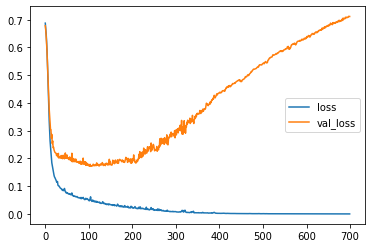

In [51]:
lossData.plot()

## EarlyStopping;

## Overfitting onune gecmek icin EarlyStopping'i kullanalim;

In [52]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=15, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [53]:
earlyStopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [55]:
model.fit(x=X_train, y=y_train, epochs=700, validation_data=(X_test, y_test), verbose=1, callbacks=[earlyStopping])

Epoch 1/700
12/12 [==============================] - 0s 10ms/step - loss: 0.6823 - val_loss: 0.6804
Epoch 2/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6645 - val_loss: 0.6678
Epoch 3/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6397 - val_loss: 0.6532
Epoch 4/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6126 - val_loss: 0.6391
Epoch 5/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5834 - val_loss: 0.6204
Epoch 6/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5531 - val_loss: 0.6052
Epoch 7/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5259 - val_loss: 0.5937
Epoch 8/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5003 - val_loss: 0.5697
Epoch 9/700
12/12 [==============================] - 0s 3ms/step - loss: 0.4755 - val_loss: 0.5612
Epoch 10/700
12/12 [==============================] - 0s 3ms/step - loss: 0.4536 - val_loss: 0.5402
Epoch 11

In [56]:
lossData2 = pd.DataFrame(data=model.history.history)

In [57]:
lossData2

,loss,val_loss
0,0.682308,0.680394
1,0.664523,0.667838
2,0.639676,0.653169
3,0.612613,0.639070
4,0.583355,0.620440
...,...,...
65,0.068820,0.243223
66,0.064991,0.250653
67,0.065868,0.242168
68,0.070671,0.246795


<AxesSubplot:>

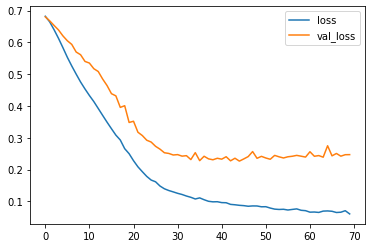

In [58]:
lossData2.plot()

## Dropout;

In [61]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(units=15, activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(units=15, activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(units=1, activation='relu'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [62]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=700, verbose=1, callbacks=[earlyStopping])

Epoch 1/700
12/12 [==============================] - 1s 12ms/step - loss: 3.7532 - val_loss: 5.9457
Epoch 2/700
12/12 [==============================] - 0s 3ms/step - loss: 3.6445 - val_loss: 5.1769
Epoch 3/700
12/12 [==============================] - 0s 3ms/step - loss: 3.3367 - val_loss: 4.4159
Epoch 4/700
12/12 [==============================] - 0s 3ms/step - loss: 2.9866 - val_loss: 3.0335
Epoch 5/700
12/12 [==============================] - 0s 3ms/step - loss: 2.8782 - val_loss: 1.8712
Epoch 6/700
12/12 [==============================] - 0s 3ms/step - loss: 2.4080 - val_loss: 1.2953
Epoch 7/700
12/12 [==============================] - 0s 3ms/step - loss: 2.5599 - val_loss: 1.1289
Epoch 8/700
12/12 [==============================] - 0s 3ms/step - loss: 2.1889 - val_loss: 1.0879
Epoch 9/700
12/12 [==============================] - 0s 3ms/step - loss: 1.9464 - val_loss: 0.9813
Epoch 10/700
12/12 [==============================] - 0s 3ms/step - loss: 1.8173 - val_loss: 0.9234
Epoch 11

12/12 [==============================] - 0s 3ms/step - loss: 0.6078 - val_loss: 0.6483
Epoch 84/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6439 - val_loss: 0.6500
Epoch 85/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6146 - val_loss: 0.6527
Epoch 86/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6085 - val_loss: 0.6440
Epoch 87/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6583 - val_loss: 0.6367
Epoch 88/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5920 - val_loss: 0.6302
Epoch 89/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6567 - val_loss: 0.6253
Epoch 90/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6058 - val_loss: 0.6257
Epoch 91/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5771 - val_loss: 0.6227
Epoch 92/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5957 - val_loss: 0.6199
Epoch 93/700


12/12 [==============================] - 0s 3ms/step - loss: 0.4856 - val_loss: 0.4455
Epoch 165/700
12/12 [==============================] - 0s 3ms/step - loss: 0.4785 - val_loss: 0.4424
Epoch 166/700
12/12 [==============================] - 0s 3ms/step - loss: 0.4468 - val_loss: 0.4316
Epoch 167/700
12/12 [==============================] - 0s 3ms/step - loss: 0.4272 - val_loss: 0.4256
Epoch 168/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5188 - val_loss: 0.4161
Epoch 169/700
12/12 [==============================] - 0s 3ms/step - loss: 0.4728 - val_loss: 0.4025
Epoch 170/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5920 - val_loss: 0.4580
Epoch 171/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5228 - val_loss: 0.4668
Epoch 172/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5735 - val_loss: 0.4529
Epoch 173/700
12/12 [==============================] - 0s 3ms/step - loss: 0.4568 - val_loss: 0.4446
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.2468 - val_loss: 0.2807
Epoch 246/700
12/12 [==============================] - 0s 4ms/step - loss: 0.3758 - val_loss: 0.2794
Epoch 247/700
12/12 [==============================] - 0s 3ms/step - loss: 0.2779 - val_loss: 0.2767
Epoch 248/700
12/12 [==============================] - 0s 3ms/step - loss: 0.3261 - val_loss: 0.2807
Epoch 249/700
12/12 [==============================] - 0s 3ms/step - loss: 0.3180 - val_loss: 0.2723
Epoch 250/700
12/12 [==============================] - 0s 3ms/step - loss: 0.2897 - val_loss: 0.2710
Epoch 251/700
12/12 [==============================] - 0s 3ms/step - loss: 0.3841 - val_loss: 0.3341
Epoch 252/700
12/12 [==============================] - 0s 3ms/step - loss: 0.3479 - val_loss: 0.3298
Epoch 253/700
12/12 [==============================] - 0s 3ms/step - loss: 0.3090 - val_loss: 0.3279
Epoch 254/700
12/12 [==============================] - 0s 3ms/step - loss: 0.3126 - val_loss: 0.2863
Epoc

In [63]:
lossData3 = pd.DataFrame(model.history.history)

In [65]:
lossData3

,loss,val_loss
0,3.753250,5.945700
1,3.644535,5.176914
2,3.336685,4.415916
3,2.986604,3.033514
4,2.878184,1.871238
...,...,...
270,0.405814,0.344454
271,0.305631,0.337782
272,0.400222,0.333661
273,0.345253,0.338040


<AxesSubplot:>

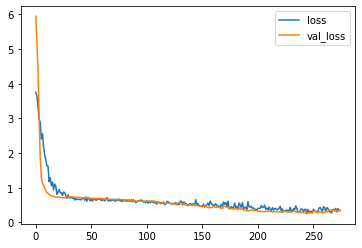

In [64]:
lossData3.plot()

In [100]:
predicts = np.argmax(model.predict(X_test), axis=-1)

6/6 [==============================] - 0s 998us/step


In [101]:
predicts

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [102]:
from sklearn.metrics import classification_report, confusion_matrix

In [105]:
print(classification_report(y_test, predicts))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71       100
           1       0.00      0.00      0.00        81

    accuracy                           0.55       181
   macro avg       0.28      0.50      0.36       181
weighted avg       0.31      0.55      0.39       181



C:\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
print(confusion_matrix(y_test, predicts))

[[100   0]
 [ 81   0]]
